# Data Exploration

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fpath = '../../data/311_sample_head.csv'
rawdf = pd.read_csv(fpath)
sample_ids = np.random.choice(rawdf.index,50000,replace=False)
df = rawdf.loc[sample_ids]

/Users/charguth/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,8,17,24,25,38,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(50000, 52)

# Explore Data by Day, Hour
SPOILER: no hourly data available

In [23]:
def str2day(value,fmt='%m/%d/%Y %I:%M:%S %p'):
    try:
        date = datetime.strptime(value,fmt)
        return date.timetuple().tm_yday
    except:
        return None

In [24]:
def str2year(value,fmt='%m/%d/%Y %I:%M:%S %p'):
    try:
        date = datetime.strptime(value,fmt)
        return date.year
    except:
        return None

In [25]:
def str2hour(value,fmt='%m/%d/%Y %I:%M:%S %p'):
    try:
        date = datetime.strptime(value,fmt)
        return date.hour
    except:
        return None

In [26]:
df['day'] = df['Created Date'].apply(str2day)

In [27]:
df['year'] = df['Created Date'].apply(str2year)

In [28]:
df['hour'] = df['Created Date'].apply(str2hour)

In [29]:
hdf = df[df['Complaint Type']=='HEATING']

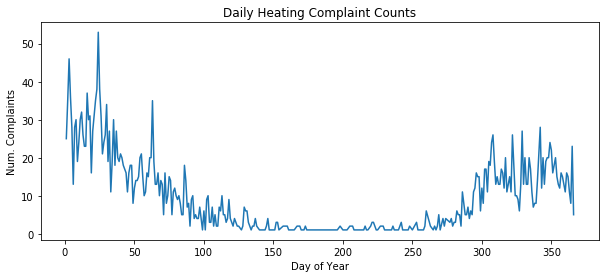

In [32]:
daily_counts = hdf.groupby('day').count()
fig, ax = plt.subplots(1,figsize=(10,4))
ax.plot(daily_counts.index,daily_counts['Unique Key'])
plt.title("Daily Heating Complaint Counts")
plt.xlabel("Day of Year")
plt.ylabel("Num. Complaints")

In [32]:
df[df['year']==2009].head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,day,hour,year
80328,13237780,02/24/2009 12:00:00 AM,04/20/2009 12:00:00 AM,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,11101,43-19 34 AVENUE,...,NaN,NaN,NaN,NaN,40.7555,-73.9182,"(40.755458085792505, -73.91824223250985)",55,0,2009
32508,13149873,02/11/2009 12:00:00 AM,02/12/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11694,320 BEACH 100 STREET,...,NaN,NaN,NaN,NaN,40.5852,-73.822,"(40.585219735482944, -73.8219529368654)",42,0,2009
31890,13127271,02/08/2009 12:00:00 AM,03/18/2009 12:00:00 AM,DEP,Department of Environmental Protection,Water System,Hydrant Leaking (WC1),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,0,2009
10372,12926601,01/14/2009 12:00:00 AM,01/16/2009 12:00:00 AM,DEP,Department of Environmental Protection,Water System,Hydrant Running (WC3),NaN,10039,159-38 HARLEM RIVER DRIVE,...,NaN,NaN,NaN,NaN,40.833,-73.9354,"(40.83299116265689, -73.93544194503936)",14,0,2009
47128,13285498,03/02/2009 12:00:00 AM,03/04/2009 12:00:00 AM,DSNY,BCC - Queens East,Snow,15S Re-Plow/Spread/Ice-Snow Cond.,Street,11365,NaN,...,NaN,NaN,NaN,NaN,40.7354,-73.7837,"(40.73535168158349, -73.78374683280181)",61,0,2009


Jan Feb March have more complaints because of the 2009 dataset, which only includes those months.

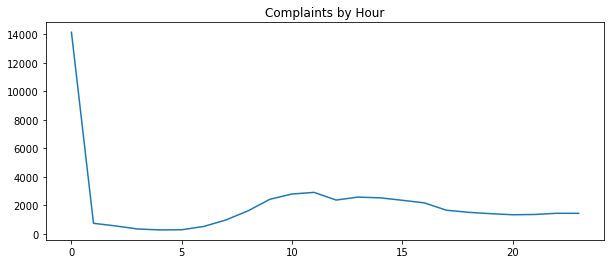

In [26]:
hourly_counts = df.groupby('hour').count()
fig, ax = plt.subplots(1,figsize=(10,4))
ax.plot(hourly_counts.index,hourly_counts.loc[:,'Unique Key'])
plt.title("Complaints by Hour")

Most complaints don't have a time recorded.

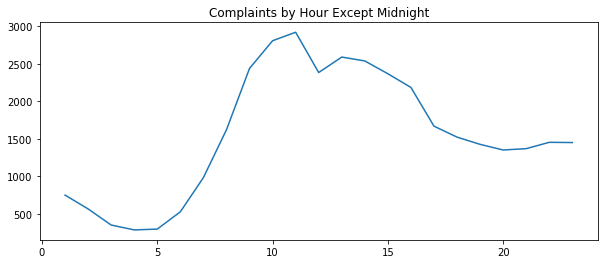

In [23]:
hourly_counts = df.groupby('hour').count()
fig, ax = plt.subplots(1,figsize=(10,4))
ax.plot(hourly_counts.index[1:],hourly_counts.loc[1:,'Unique Key'])
plt.title("Complaints by Hour Except Midnight")

Taking out midnight, we see a more reasonable set of complaints by hour

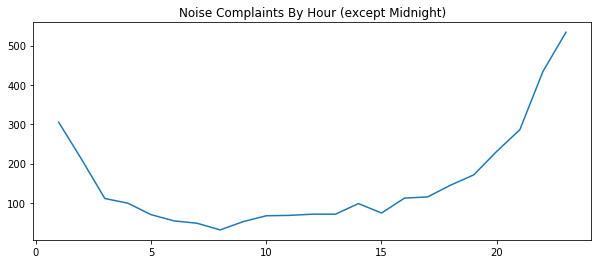

In [24]:
noise = df[df['Complaint Type']=='Noise - Residential']
hourly_counts = noise.groupby('hour').count()
fig, ax = plt.subplots(1,figsize=(10,4))
ax.plot(hourly_counts.index[1:],hourly_counts.loc[1:,'Unique Key'])
plt.title("Noise Complaints By Hour (except Midnight)")

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,4))
ax.plot(daily_counts.index,daily_counts['Unique Key'])

In [ ]:
value = df.loc[489102,'Created Date']
date = datetime.strptime(value,'%m/%d/%Y %I:%M:%S %p')

# Unique Complaint Types

In [113]:
df['Complaint Type'].unique()

array(['CONSTRUCTION', 'ELECTRIC', 'Street Condition', 'NONCONST',
       'GENERAL CONSTRUCTION', 'Dirty Conditions', 'PAINT - PLASTER',
       'Street Light Condition', 'Blocked Driveway', 'HEATING',
       'Water System', 'Elevator', 'Air Quality', 'Food Establishment',
       'Public Payphone Complaint', 'Noise', 'APPLIANCE',
       'Noise - Commercial', 'PLUMBING', 'Derelict Vehicle',
       'Traffic Signal Condition', 'Taxi Complaint', 'Highway Condition',
       'Smoking', 'For Hire Vehicle Complaint', 'Derelict Vehicles',
       'Missed Collection (All Materials)', 'Broken Muni Meter',
       'Sidewalk Condition', 'General Construction/Plumbing',
       'Noise - Vehicle', 'Sanitation Condition',
       'Root/Sewer/Sidewalk Condition', 'Building/Use', 'Sewer', 'Rodent',
       'Snow', 'Special Projects Inspection Team (SPIT)', 'Plumbing',
       'Indoor Air Quality', 'Consumer Complaint',
       'Overgrown Tree/Branches', 'Investigations and Discipline (IAD)',
       'Water Conse

In [102]:
df[df['Complaint Type']=='Noise'].groupby('hour').count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,day
hour,,,,,,,,,,,,,,,,,,,,,
0,757,757,743,757,757,757,757,0,733,558,...,0,0,0,0,0,0,733,733,733,757


In [117]:
df.loc[df['Complaint Type']=='HEATING','Latitude'].unique()

array([ 40.70397649,  40.86729   ,  40.64332451, ...,  40.81236414,
        40.65358519,  40.64692855])

In [67]:
df['Latitude']= df['Latitude'].apply(lambda x: float(x))
df['Longitude']= df['Longitude'].apply(lambda x: float(x))

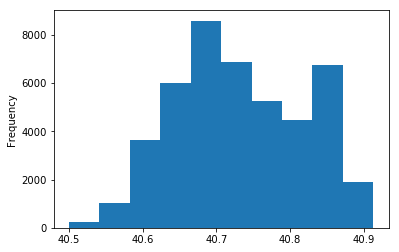

In [69]:
df['Latitude'].plot.hist()

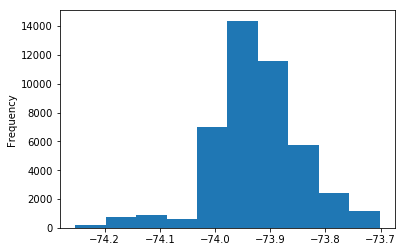

In [68]:
df['Longitude'].plot.hist()

## 10.5% of lat/longs are null

In [75]:
df['Longitude'].isnull().sum()*1./df.shape[0]

0.10578

In [76]:
df['Latitude'].isnull().sum()*1./df.shape[0]

0.10578